# Prediction of Hotels Booking Cancellation 

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,    
)

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Section 1
## 1.1 Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("../data/raw/booking_original.csv")

In [3]:
df.head(n=5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.sample(n=6, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled


In [5]:
df.shape

(36275, 19)

**Let's see duplicate data**

In [6]:
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There is no duplicate data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


## 1.2 Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

We gonna change the variables: required_car_parking_space, repeated_guest into categorical variables

In [9]:
df['required_car_parking_space'] = df['required_car_parking_space'].astype("object") 
df['repeated_guest'] = df['repeated_guest'].astype("object")

We gonna replace the binary data by strings 'Yes' or 'No'

In [10]:
index_aux=df[df['required_car_parking_space']==1].index.tolist()
df.loc[index_aux,'required_car_parking_space']='Yes'
index_aux=df[df['required_car_parking_space']==0].index.tolist()
df.loc[index_aux,'required_car_parking_space']='No'

index_aux=df[df['repeated_guest']==1].index.tolist()
df.loc[index_aux,'repeated_guest']='Yes'
index_aux=df[df['repeated_guest']==0].index.tolist()
df.loc[index_aux,'repeated_guest']='No'

In [11]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275,2,No,35151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


The min year is **2017** and max year is **2018** in the data.

The min month is 1 being that January, and max month is 12 being that December.

In [13]:
## To plot quantitive variables
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

## 1.3 EDA

- It is a good idea to explore the data once again after manipulating it.

**1. What are the busiest months in the hotel?**

We need to convert them into categorical variables

In [14]:
df['arrival_year'] = df['arrival_year'].astype("object")
df['arrival_month'] = df['arrival_month'].astype("object")

In [15]:
years=['2017','2018']
months=['January','February','March','April','May','June','July','August','September','October','November','December']

y_num=2017
for y_text in years:
    index_aux=df[df['arrival_year']==y_num].index.tolist()
    df.loc[index_aux,'arrival_year']=y_text
    y_num=y_num+1
    
m_num=1
for m_text in months:
    index_aux=df[df['arrival_month']==m_num].index.tolist()
    df.loc[index_aux,'arrival_month']=m_text
    m_num=m_num+1    

In [16]:
df[['arrival_year','arrival_month']].describe()

,arrival_year,arrival_month
count,36275,36275
unique,2,12
top,2018,October
freq,29761,5317


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

**Number of adults**

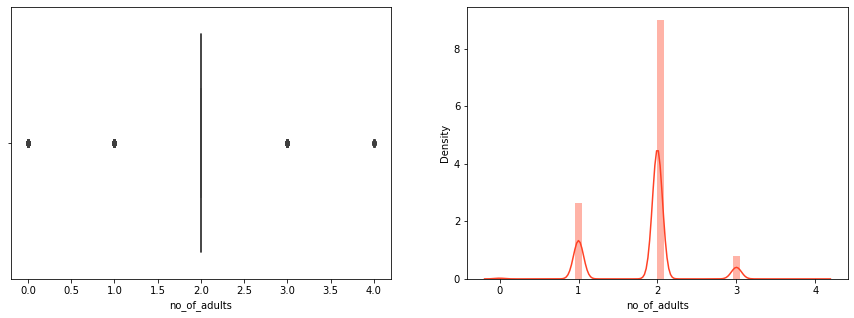

In [56]:
plot_num('no_of_adults')

In [57]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

**Number of children**

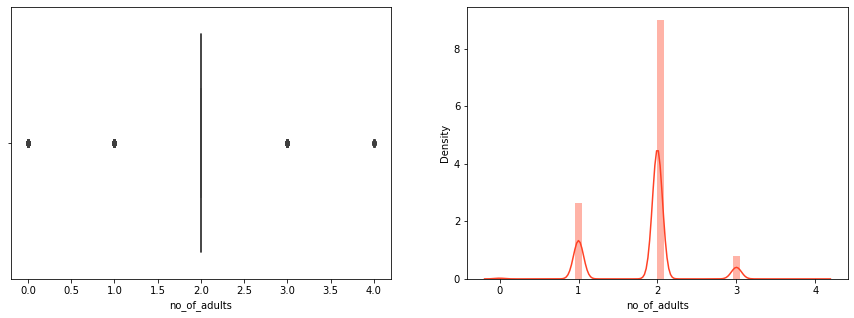

In [58]:
plot_num('no_of_adults')

In [59]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

**Number of weekend nights**

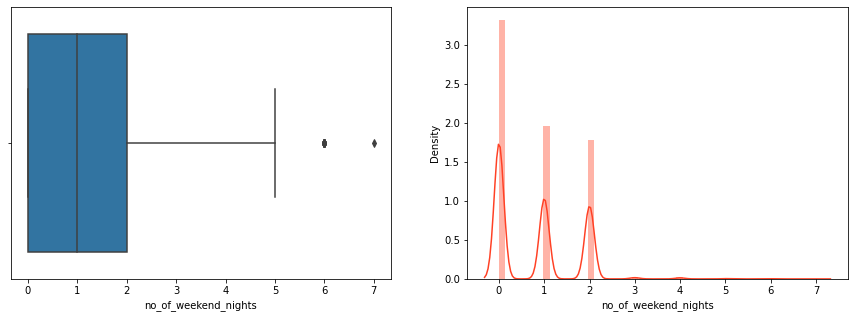

In [60]:
plot_num('no_of_weekend_nights')

**Number of week nights**

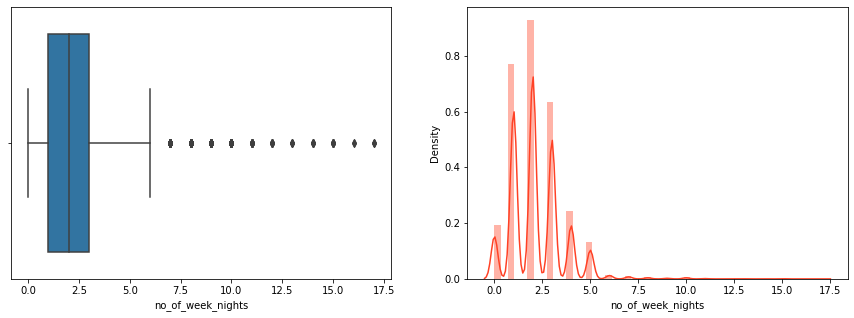

In [61]:
plot_num('no_of_week_nights')

* This is a right skewed distribution, so we can get its logarithm for a better distribution

In [18]:
df["no_of_week_nights_log"] = np.log(df["no_of_week_nights"]+1)

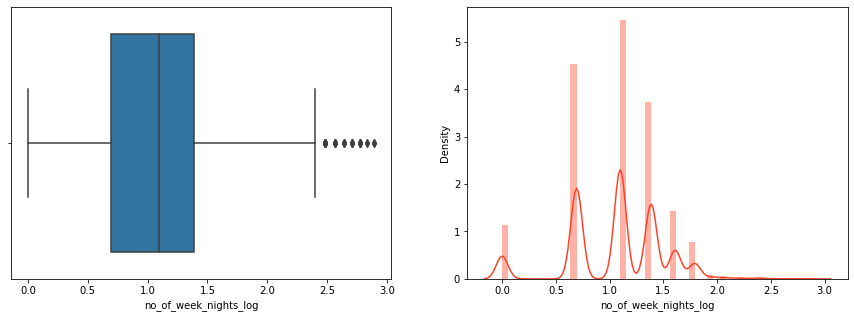

In [63]:
plot_num('no_of_week_nights_log')

**Arrival date (day)**

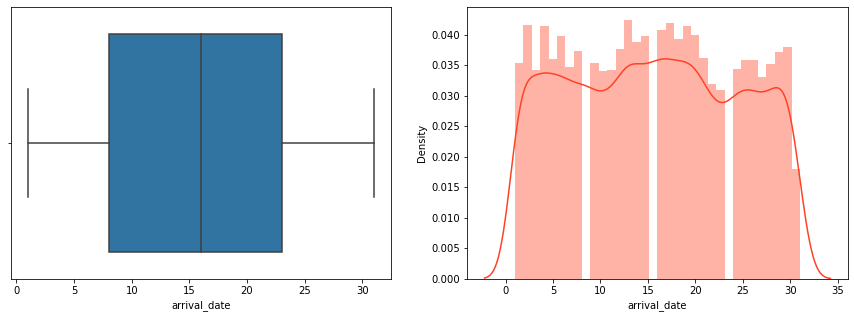

In [64]:
plot_num('arrival_date')

**Lead time**

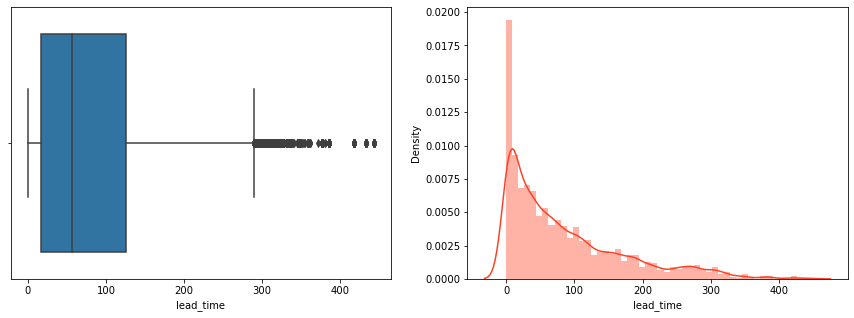

In [65]:
plot_num('lead_time')

* This is a very right skewed distribution, so we can get the logarithm for a better distribution

In [19]:
df["lead_time_log"] = np.log(df["lead_time"]+1)

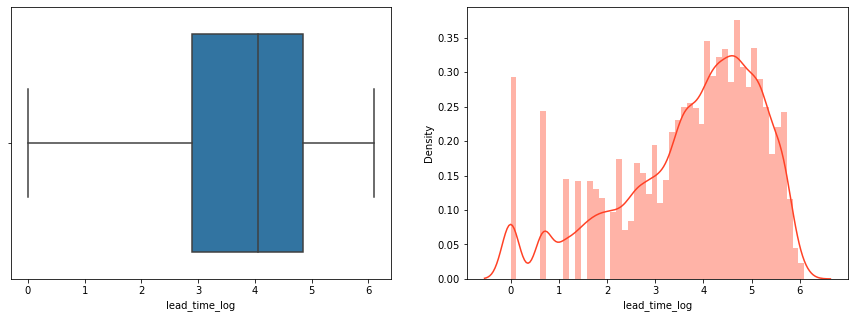

In [67]:
plot_num('lead_time_log')

**Number of previous cancellation**

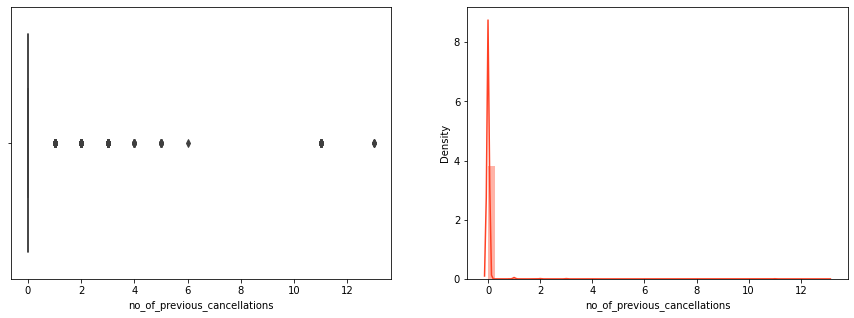

In [68]:
plot_num('no_of_previous_cancellations')

* Let's see a wider insight about what happen with another number of cancellations since 1. 

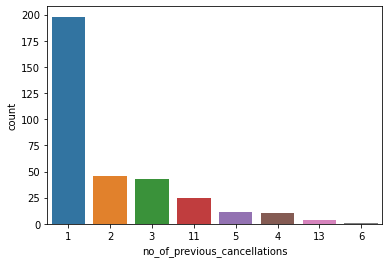

In [122]:
sns.countplot(data=df,x='no_of_previous_cancellations',order=df['no_of_previous_cancellations'].value_counts()[1:9].index);

**Number of previous bookings not cancelled**

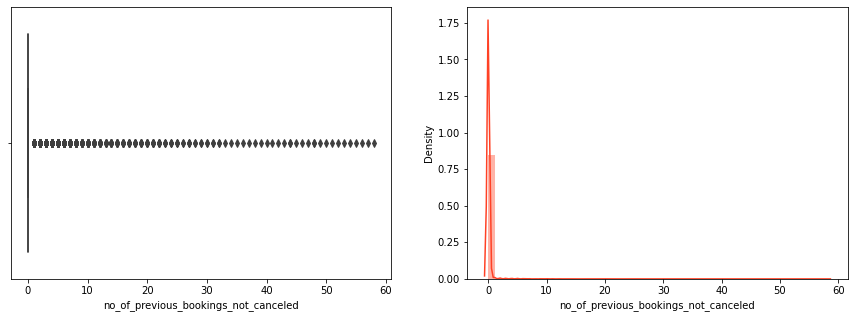

In [123]:
plot_num('no_of_previous_bookings_not_canceled')

In [124]:
df['no_of_previous_bookings_not_canceled'].value_counts()[0:20]

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
Name: no_of_previous_bookings_not_canceled, dtype: int64

**Average price per room**

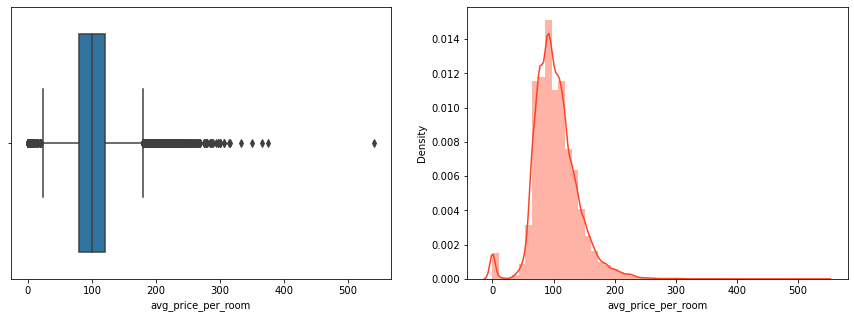

In [72]:
plot_num('avg_price_per_room')

**Number of special requests**

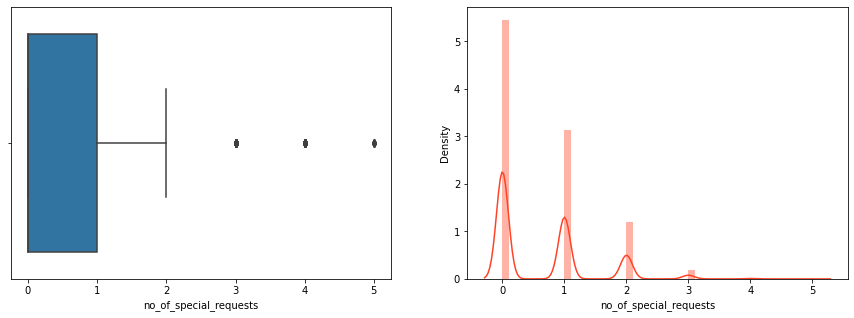

In [73]:
plot_num('no_of_special_requests')

In [125]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
no_of_week_nights_log                   0
dtype: int64

### Outlier Check

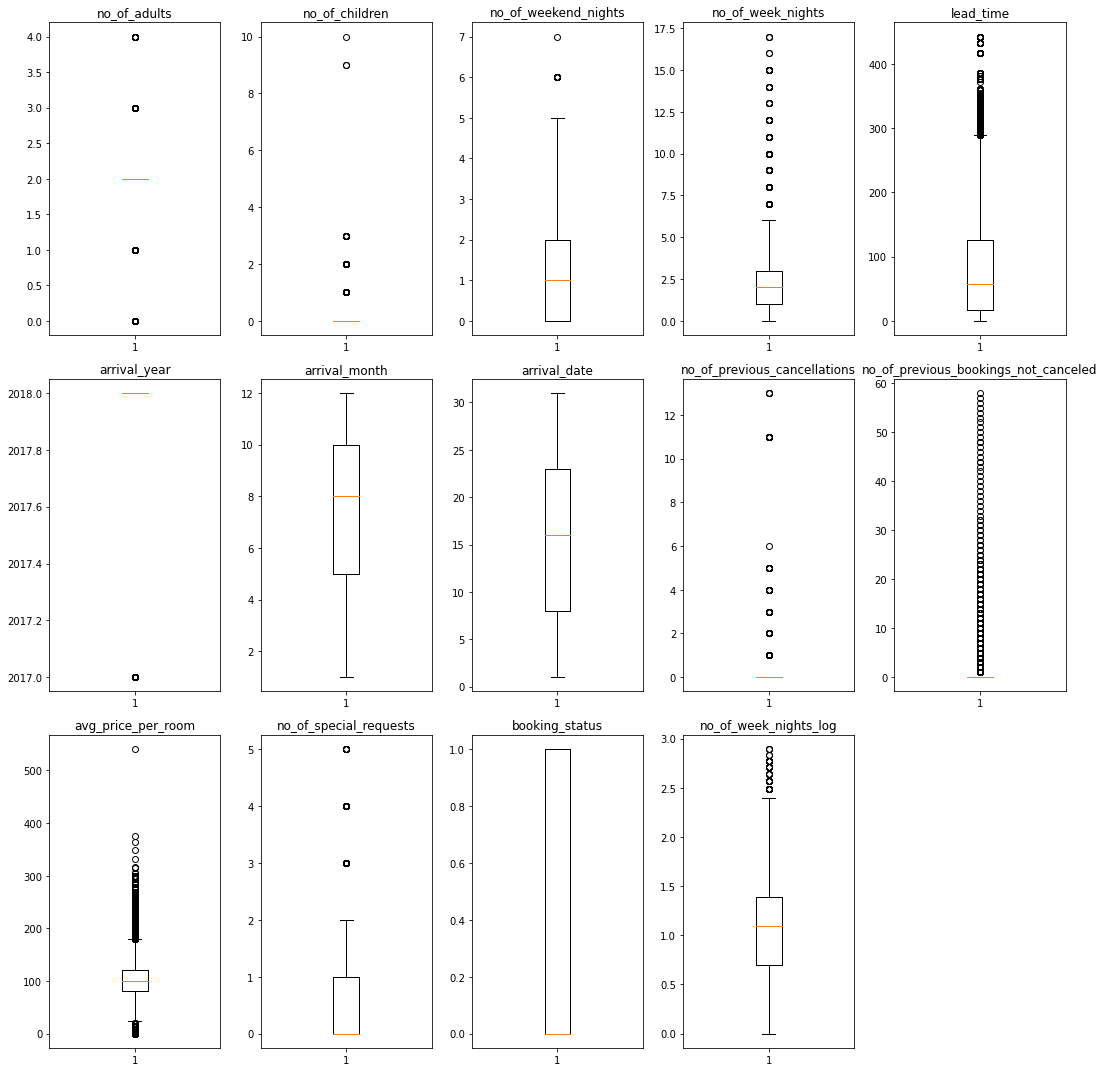

In [126]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [20]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Low_Whisker = Q1 - 1.5 * IQR
    Upp_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Low_Whisker, Upp_Whisker)


def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

### Here we remove and replace the outliers by whiskers, mainly in these columns

In [21]:
treat_outliers(df,'lead_time')

In [22]:
treat_outliers(df,'avg_price_per_room')

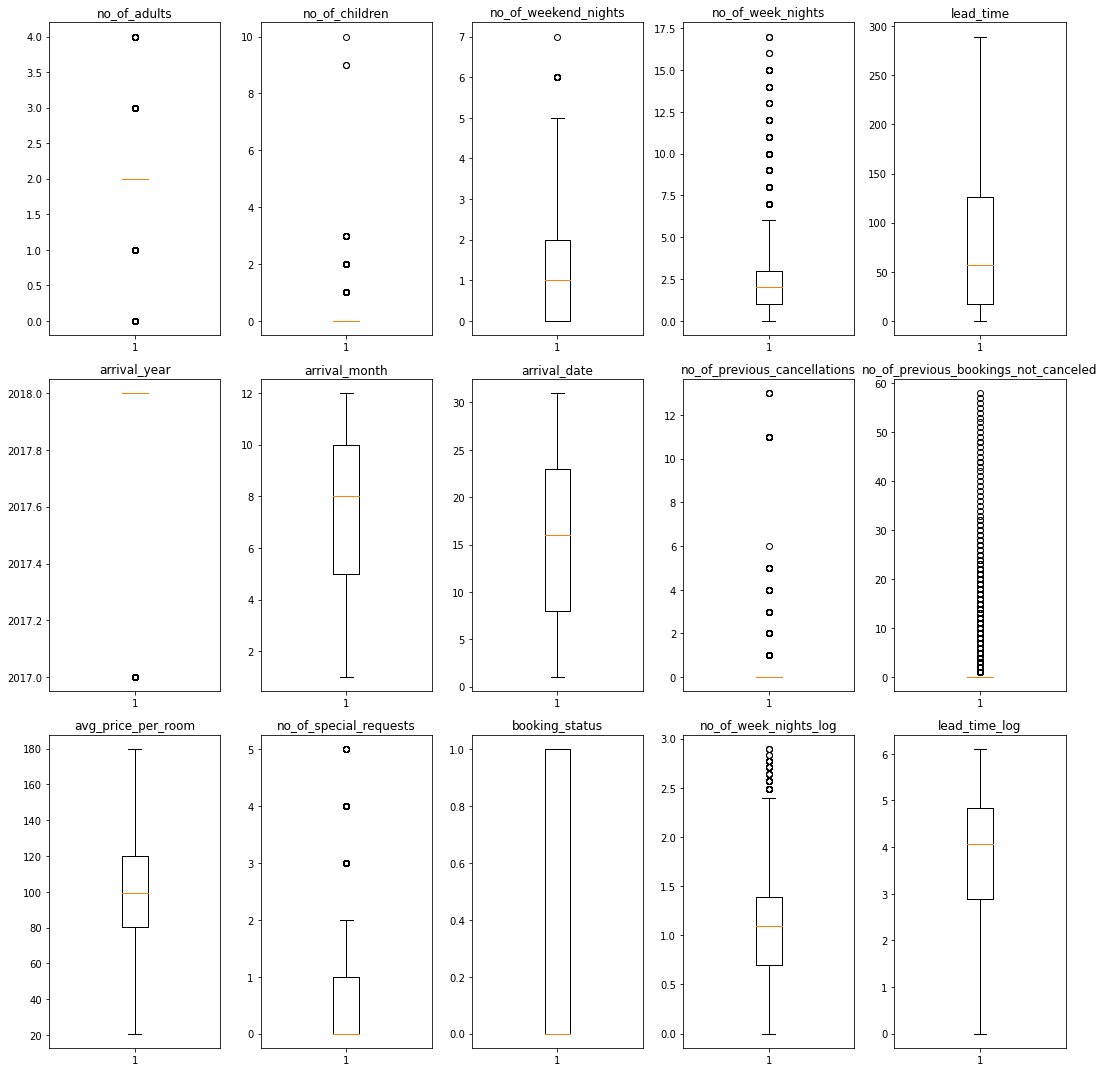

In [79]:
# outlier detection using boxplot and clean outliers on lead_time and avg_price_per_room
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

In [23]:
# Transformation to category
df['Booking_ID'] = df['Booking_ID'].astype('category')
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['booking_status'] = df['booking_status'].astype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  category
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  float64 
 9   arrival_year                          36275 non-null  category
 10  arrival_month                         36275 non-null  category
 11  ar

In [25]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_week_nights_log,lead_time_log
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224.0,2017,...,2,Offline,No,0,0,65.00,0,0,1.098612,5.416100
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5.0,2018,...,6,Online,No,0,0,106.68,1,0,1.386294,1.791759
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1.0,2018,...,28,Online,No,0,0,60.00,0,1,0.693147,0.693147
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211.0,2018,...,20,Online,No,0,0,100.00,0,1,1.098612,5.356586
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48.0,2018,...,11,Online,No,0,0,94.50,0,1,0.693147,3.891820


# Section 2
## 2.1 Building a Logistic Regression model

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [26]:
df1=df.copy()

In [27]:
df1.drop(['Booking_ID'],axis=1,inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  float64 
 8   arrival_year                          36275 non-null  category
 9   arrival_month                         36275 non-null  category
 10  arrival_date                          36275 non-null  int64   
 11  ma

**Getting the dummies variables**

In [44]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [45]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
6870,1.0,2,0,2,3,5.0,30,0,0,116.0,...,0,0,0,0,0,0,0,0,1,0
531,1.0,2,1,0,3,86.0,8,0,0,122.0,...,0,0,0,0,0,0,0,0,1,0
3394,1.0,1,0,0,3,105.0,5,0,0,117.3,...,0,1,0,0,0,0,0,0,1,0
23540,1.0,1,0,1,1,85.0,3,0,0,98.0,...,0,0,0,0,0,0,0,0,1,0
15302,1.0,2,0,1,2,289.5,13,0,0,101.0,...,0,1,0,0,0,0,0,1,0,0


### 2.1.1 Logistic Regression Model Performance

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold #if is more than threshold then print
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

         Current function value: 0.408770
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.813209,0.665705,0.7384,0.700171


In [48]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25352
Method:                           MLE   Df Model:                           39
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.3537
Time:                        12:31:46   Log-Likelihood:                -10379.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.2195      0.290    -11.118      0.000      -3.787      -2.652
no_of_adults                             0.0404      

### 2.1.2 Checking Multicollinearity

The next is to check the performance

In [34]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred) #actual values , predict values
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [35]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):    
    vif_series1 = pd.Series(
        [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])],
        index=predictors.columns,
    )
    i=0
    for num in vif_series1: 
        num='{0:.4g}'.format(num)
        vif_series1[i]=num
        i=i+1
    return vif_series1[vif_series1.values<=10], vif_series1[vif_series1.values>10] 

In [36]:
vif_less10,vif_greater10 = checking_vif(X_train)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.406
no_of_children                          2.037
no_of_weekend_nights                    1.254
lead_time                               3.642
arrival_date                            1.015
no_of_previous_cancellations            1.331
no_of_previous_bookings_not_canceled    1.577
avg_price_per_room                      2.485
no_of_special_requests                  1.254
lead_time_log                           3.756
type_of_meal_plan_Meal Plan 2           1.271
type_of_meal_plan_Meal Plan 3           1.008
type_of_meal_plan_Not Selected          1.304
required_car_parking_space_Yes          1.042
room_type_reserved_Room_Type 2          1.098
room_type_reserved_Room_Type 3          1.004
room_type_reserved_Room_Type 4          1.378
room_type_reserved_Room_Type 5          1.033
room_type_reserved_Room_Type 6          1.972
room_type_reserved_Room_Type 7          1.078
arrival_year_2018                       1.584
arrival_month_August   

In [76]:
np.linalg.det([[3,5],[56,87]])

-19.000000000000014

* **First Let's see dropping: market_segment_type_Online**

In [37]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_less10,vif_greater10 = checking_vif(X_train1)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.394
no_of_children                          2.037
no_of_weekend_nights                    1.253
lead_time                               3.641
arrival_date                            1.015
no_of_previous_cancellations            1.331
no_of_previous_bookings_not_canceled    1.577
avg_price_per_room                      2.479
no_of_special_requests                  1.250
lead_time_log                           3.730
type_of_meal_plan_Meal Plan 2           1.271
type_of_meal_plan_Meal Plan 3           1.008
type_of_meal_plan_Not Selected          1.301
required_car_parking_space_Yes          1.042
room_type_reserved_Room_Type 2          1.098
room_type_reserved_Room_Type 3          1.004
room_type_reserved_Room_Type 4          1.373
room_type_reserved_Room_Type 5          1.033
room_type_reserved_Room_Type 6          1.972
room_type_reserved_Room_Type 7          1.078
arrival_year_2018                       1.579
arrival_month_August   

In [38]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.409937
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.812303,0.665585,0.736205,0.699116


* There is no significant change in the model performance as compared to initial model.

* **Now Let's drop: no_of_week_nights_log**

In [39]:
X_train2 = X_train1.drop("no_of_week_nights_log", axis=1)
vif_less10,vif_greater10 = checking_vif(X_train2)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.391
no_of_children                          2.037
no_of_weekend_nights                    1.082
no_of_week_nights                       1.123
lead_time                               3.637
arrival_date                            1.015
no_of_previous_cancellations            1.331
no_of_previous_bookings_not_canceled    1.576
avg_price_per_room                      2.477
no_of_special_requests                  1.249
lead_time_log                           3.678
type_of_meal_plan_Meal Plan 2           1.270
type_of_meal_plan_Meal Plan 3           1.008
type_of_meal_plan_Not Selected          1.297
required_car_parking_space_Yes          1.042
room_type_reserved_Room_Type 2          1.097
room_type_reserved_Room_Type 3          1.004
room_type_reserved_Room_Type 4          1.373
room_type_reserved_Room_Type 5          1.033
room_type_reserved_Room_Type 6          1.972
room_type_reserved_Room_Type 7          1.078
arrival_year_2018      

In [40]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

         Current function value: 0.411597
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.810413,0.661017,0.733885,0.695548


### 2.1.3. Dropping high p-values

In [41]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25354
Method:                           MLE   Df Model:                           37
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.3492
Time:                        12:55:37   Log-Likelihood:                -10451.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.0430      0.148    -20.597      0.000      -3.333      -2.753
no_of_adults                            -0.0504      

In [43]:
# running a loop to drop variables with high p-value
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False, method='bfgs')

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

In [83]:
print(selected_features)

['const', 'no_of_weekend_nights', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'lead_time_log', 'type_of_meal_plan_Meal Plan 2', 'required_car_parking_space_Yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'arrival_year_2018', 'arrival_month_August', 'arrival_month_December', 'arrival_month_February', 'arrival_month_January', 'arrival_month_July', 'arrival_month_March', 'arrival_month_May', 'arrival_month_November', 'arrival_month_September', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [84]:
X_train3 = X_train2[selected_features]

In [85]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(method='bfgs')

print(lg3.summary())

         Current function value: 0.410677
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.3507
Time:                        17:24:05   Log-Likelihood:                -10428.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                   

In [86]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Dataframe: adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_weekend_nights,lead_time,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,lead_time_log,type_of_meal_plan_Meal Plan 2,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_September,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.025034,1.167247,1.014513,0.313070,1.017666,0.206338,1.238366,1.523935,0.285914,0.727968,0.767400,1.810553,0.693263,0.154460,1.961233,0.254288,0.743814,1.237902,0.662321,1.391856,0.71404,0.268164,0.131672
Change_odd%,-97.496617,16.724655,1.451294,-68.692967,1.766628,-79.366226,23.836650,52.393488,-71.408558,-27.203221,-23.259952,81.055267,-30.673712,-84.554031,96.123294,-74.571155,-25.618550,23.790200,-33.767864,39.185557,-28.59597,-73.183644,-86.832792


In [104]:
print(np.exp(-3.6875))
print((np.exp(-3.6875) - 1) * 100)

0.025034510149960148
-97.49654898500398


## 2.2 Model performance evaluation

* **Model Performance on the training set, threshold = 0.5**

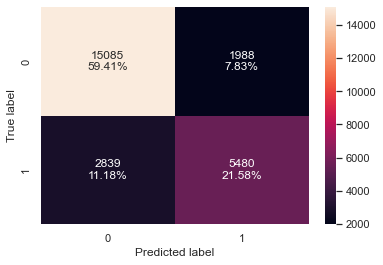

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [88]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train #it has by default threshold = 0.5
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.809901,0.658733,0.733798,0.694242


**ROC curve on train set**

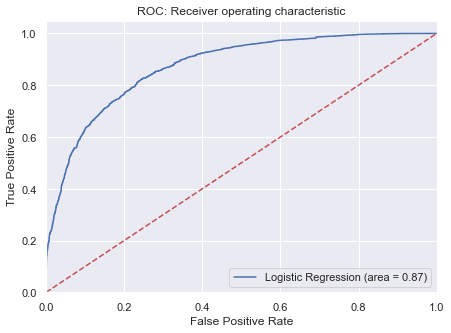

In [89]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3)) #ROC is blue, #AUC: is Area under curve until red line
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [90]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3)) #y_true, y_score

optimal_idx = np.argmax(tpr - fpr) #Returns the indices of the maximum values along an axis.
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29367810788289517


In [107]:
np.round(0.29367810788289517,1)

0.3

* **Checking the model performance with this new threshold = 0.3**

In [91]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc #as we increase the threshold the precision decrease
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.778198,0.822094,0.622236,0.708338


**Let's use Precision-Recall curve and see if we can find a better threshold**

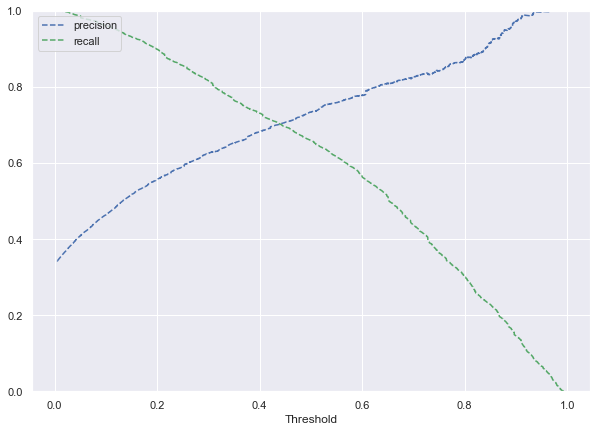

In [92]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* **Let's use a threshold of 0.40**

In [93]:
# setting the threshold
optimal_threshold_curve = 0.40

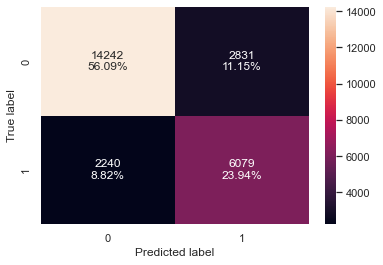

In [94]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [95]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800291,0.730737,0.682267,0.705671


### Model Performance Summary

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression (0.3) Threshold",
    "Logistic Regression (0.40) Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression (0.3) Threshold,Logistic Regression (0.40) Threshold
Accuracy,0.809901,0.778198,0.800291
Recall,0.658733,0.822094,0.730737
Precision,0.733798,0.622236,0.682267
F1,0.694242,0.708338,0.705671


* We see that in the model with threshold = 0.3, the Recall is high but the Precision is a bit lower.

### Checking the model on the test set

Let's get only the neccesary columns for the test  

In [98]:
X_test3 = X_test[list(X_train3.columns)]

**Threshold = 0.5**

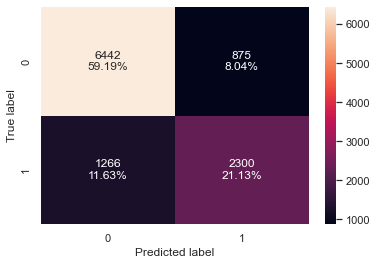

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [100]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803271,0.64498,0.724409,0.682391


* **ROC curve on test set**

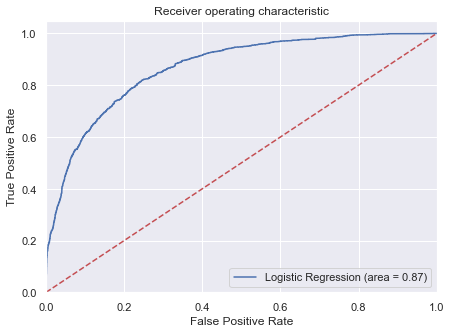

In [101]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [102]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3)) #y_true, y_score

optimal_idx = np.argmax(tpr - fpr) #Returns the indices of the maximum values along an axis.
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29352101075830545


**Threshold = 0.3**

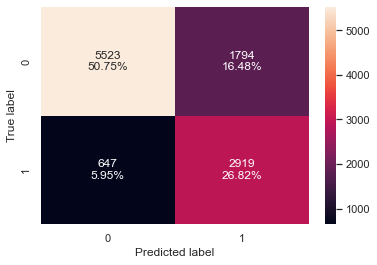

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [104]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.775705,0.818564,0.619351,0.705158


**Threshold = 0.40** 

In [110]:
print("optimal_threshold_curve:",optimal_threshold_curve)

optimal_threshold_curve: 0.4


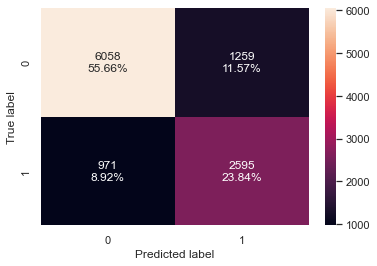

In [109]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [111]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795093,0.727706,0.673326,0.699461


## 2.3 Final Model Summary

In [216]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3 Threshold,Logistic Regression-0.40 Threshold
Accuracy,0.809901,0.778198,0.800291
Recall,0.658733,0.822094,0.730737
Precision,0.733798,0.622236,0.682267
F1,0.694242,0.708338,0.705671


In [217]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3 Threshold,Logistic Regression-0.40 Threshold
Accuracy,0.803271,0.775705,0.795093
Recall,0.644980,0.818564,0.727706
Precision,0.724409,0.619351,0.673326
F1,0.682391,0.705158,0.699461


- The performance in both sets (training and testing) are almost the same with any threshold, but in the model with threshold = 0.3 that was obtained in ROC-AUC, Recall is a little better and always we say that, Recall is more important than Precision.

# Section 3
## 3.1 Building a Decision Tree model

In [115]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


### 3.1.1 Decision Tree Model

In [116]:
dTree = DecisionTreeClassifier(criterion = 'gini',
                               class_weight={0: 0.67, 1: 0.33}, random_state=1) #random_state: the same sample again, 
                                                                    #criterion coould be also 'entropy'
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

**Accuracy in Decision Tree**

In [117]:
print("Accuracy on training set : ",dTree.score(X_train, y_train)) 
print("Accuracy on test set : ",dTree.score(X_test, y_test)) 

Accuracy on training set :  0.9940138626339005
Accuracy on test set :  0.857943581732978


The accuracy is high and almost the same

### 3.1.2 Confusion Matrix

In [118]:
## Function to create confusion matrix
def make_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [234]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [119]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",recall_score(y_train,pred_train))
    print("Recall on test set : ",recall_score(y_test,pred_test))

**Confusion matrix on train and test set**

**Train set**

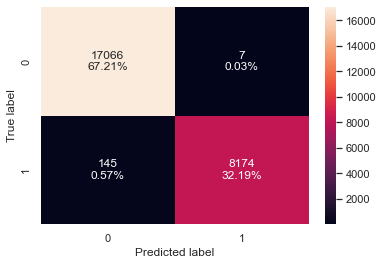

In [166]:
make_confusion_matrix(dTree,X_train, y_train)

In [223]:
decision_tree_perf_train = get_recall_score(dTree, X_train, y_train)

**Test set**

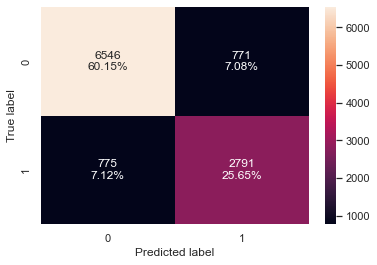

In [120]:
make_confusion_matrix(dTree,X_test, y_test)

In [225]:
decision_tree_perf_test = get_recall_score(dTree, X_test, y_test)

**Recall**

In [122]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9825700204351484
Recall on test set :  0.7826696578799776


* The Recall on training set is 0.98, almost 1, and Recall on test set is 0.78. We can say that the model is a little **"overfitting"**.

### 3.1.3 Visualization the Decision Tree

In [123]:
feature_names = list(X.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'no_of_week_nights_log', 'lead_time_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_Yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'arrival_year_2018', 'arrival_month_August', 'arrival_month_December', 'arrival_month_February', 'arrival_month_January', 'arrival_month_July', 'arrival_month_June', 'arrival_month_March', 'arrival_month_May', 'arrival_month_November', 'arrival_month_October', 'arrival_month_September', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Off

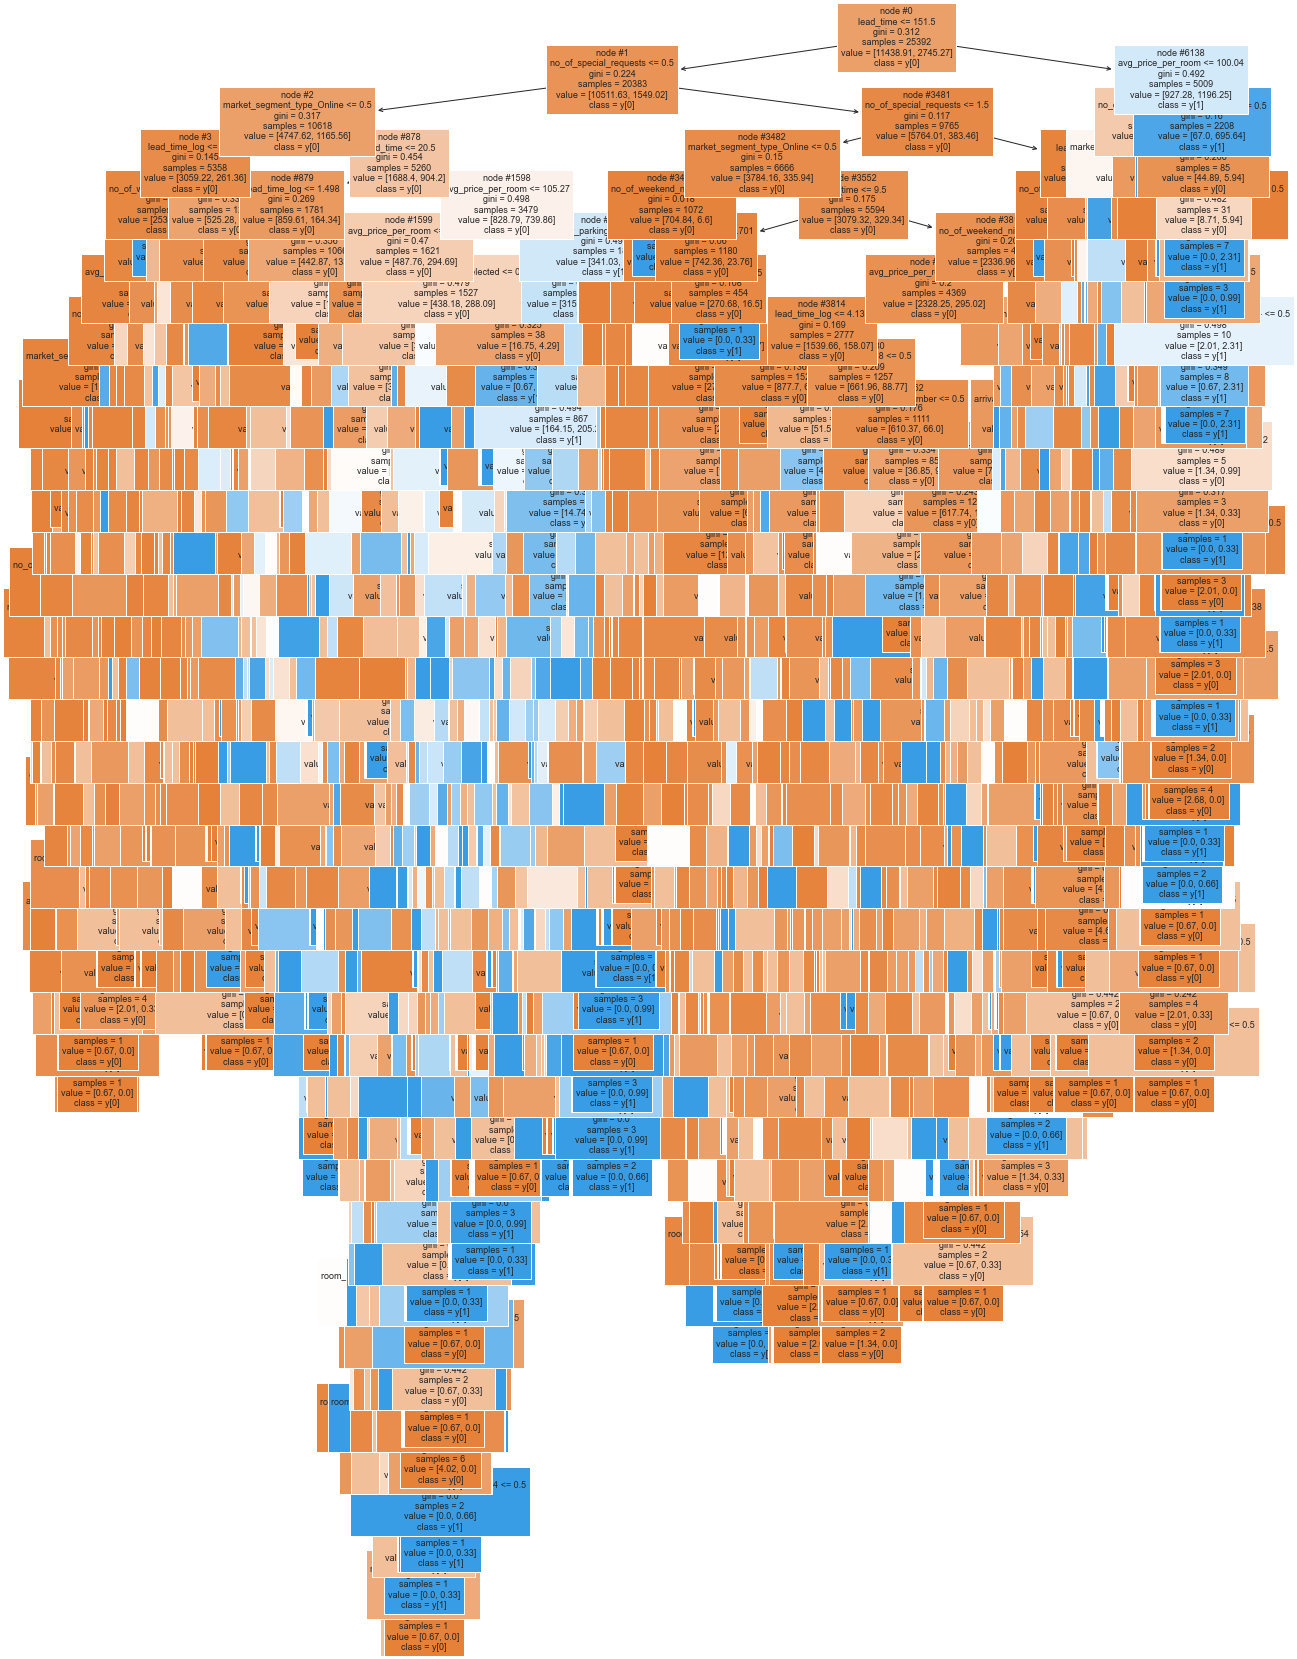

In [124]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_log <= 4.52
|   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 107.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  107.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 1.50
|   |   |   |   |   |   |  

* The tree above is very complex and difficult to interpret.

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                               Imp
lead_time                             2.516380e-01
avg_price_per_room                    1.877803e-01
arrival_date                          8.866238e-02
market_segment_type_Online            8.311680e-02
lead_time_log                         7.480307e-02
no_of_special_requests                5.522309e-02
no_of_weekend_nights                  3.546096e-02
arrival_month_December                3.039023e-02
no_of_week_nights                     2.844300e-02
no_of_adults                          2.704304e-02
no_of_week_nights_log                 2.366351e-02
arrival_year_2018                     1.334284e-02
arrival_month_June                    9.394192e-03
arrival_month_October                 7.859688e-03
room_type_reserved_Room_Type 4        7.761818e-03
type_of_meal_plan_Not Selected        7.702394e-03
arrival_month_July                    7.338337e-03
type_of_meal_plan_Meal Plan 2         6.966222e-03
arrival_month_November         

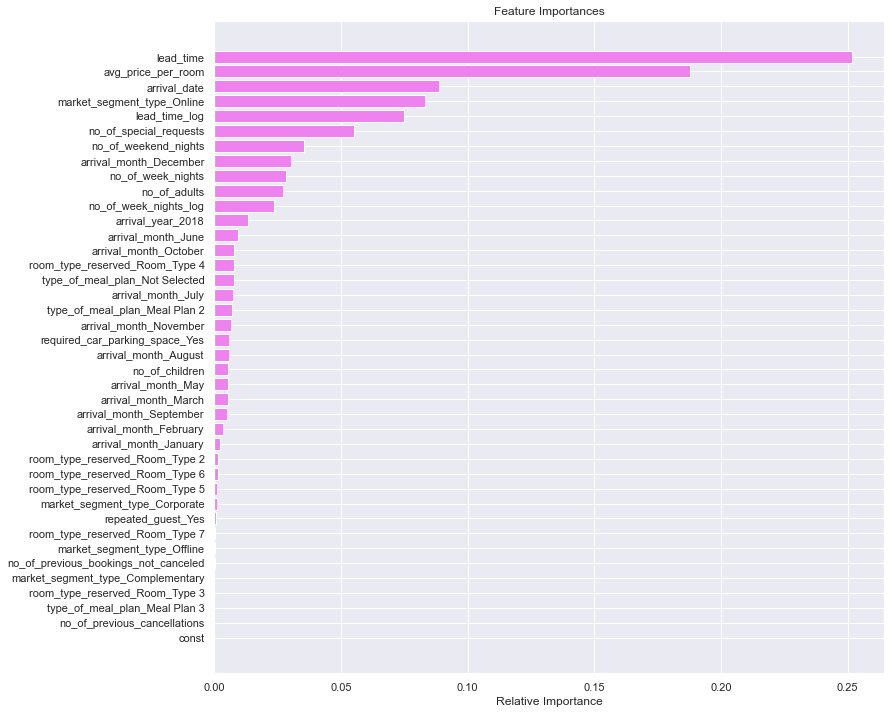

In [127]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, **Lead_time** is the most important variable to predict the cancellations.

## Do we need to prune the tree?: YES

## 3.2 Reducing over fitting

### 3.2.1 Grid Search with cross validation
**In this section we do a Pre-pruning getting with Hyparameter Tuning using Grid Search**

In [154]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})

# Grid of parameters to choose from
#parameters = {
#    "max_depth": [5, 10, 15, None],
#    "criterion": ["entropy", "gini"],
#    "splitter": ["best", "random"],
#    "min_impurity_decrease": [0.00001,0.0001,0.001]
#}


parameters = {'max_depth': np.arange(5,15), 
              'criterion': ["entropy", "gini"],
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],              
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }


# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, criterion='entropy',
                       max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.001, random_state=1)

**Checking performance on training set** 

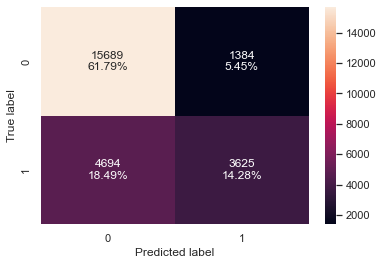

In [155]:
make_confusion_matrix(estimator, X_train, y_train)

In [226]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)

**Checking performance on test set**

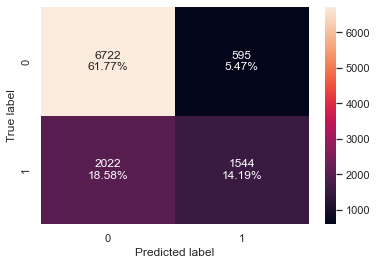

In [156]:
make_confusion_matrix(estimator, X_test, y_test)

In [227]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)

**Recall on Training and test set**

In [157]:
# Recall on train and test
get_recall_score(estimator)

Recall on training set :  0.43574948912128864
Recall on test set :  0.43297812675266406


Recall is not high but the model works good in both sets.

### Visualizing the Decision Tree

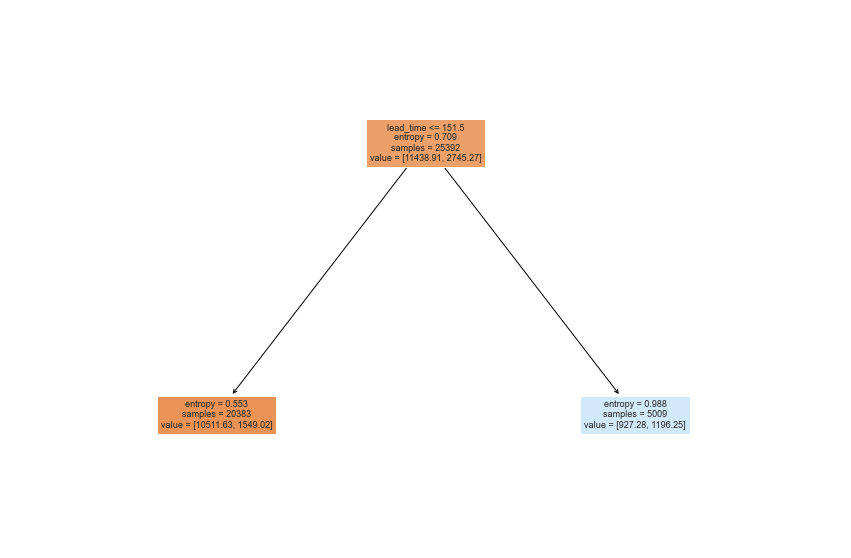

In [158]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

With the method Hyparameter Tuning we get a model too much simple, and it will not work well for our purpose.

In [159]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- weights: [10511.63, 1549.02] class: 0
|--- lead_time >  151.50
|   |--- weights: [927.28, 1196.25] class: 1



In [160]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                      Imp
lead_time                             1.0
const                                 0.0
arrival_month_March                   0.0
arrival_year_2018                     0.0
arrival_month_August                  0.0
arrival_month_December                0.0
arrival_month_February                0.0
arrival_month_January                 0.0
arrival_month_July                    0.0
arrival_month_June                    0.0
arrival_month_May                     0.0
room_type_reserved_Room_Type 6        0.0
arrival_month_November                0.0
arrival_month_October                 0.0
arrival_month_September               0.0
market_segment_type_Complementary     0.0
market_segment_type_Corporate         0.0
market_segment_type_Offline           0.0
market_segment_type_Online            0.0
room_type_reserved_Room_Type 7        0.0
room_type_reserved_Room_Type 5        0.0
no_of_adults                          0.0
no_of_special_requests            

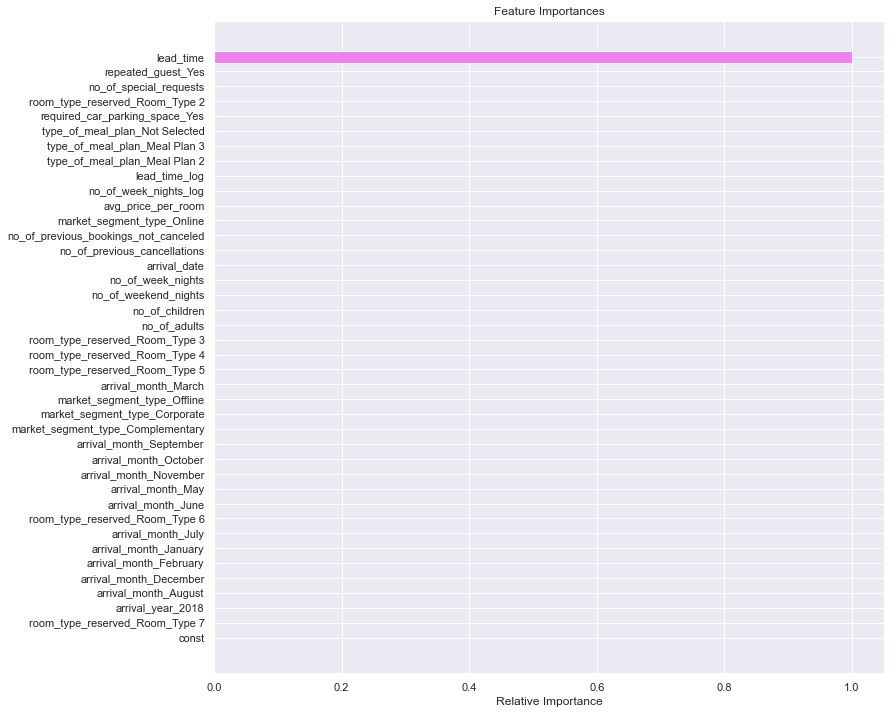

In [161]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The unique variable to use is lead_time, so we need to try for another ways.

### 3.2.2 Cost Complexity Pruning

In [162]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [163]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007421
1,0.000000e+00,0.007421
2,2.206302e-07,0.007422
3,4.327745e-07,0.007422
4,7.032586e-07,0.007423
...,...,...
1345,7.146763e-03,0.286917
1346,1.256596e-02,0.299483
1347,1.659748e-02,0.316080
1348,2.369501e-02,0.363470


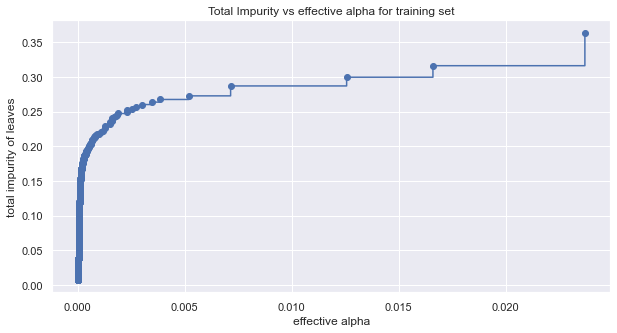

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

The low levels of impurity is only where effective alpha is to small

In [165]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07710217431082489


The higher alpha values the lower number of nodes and lesser depth of tree.

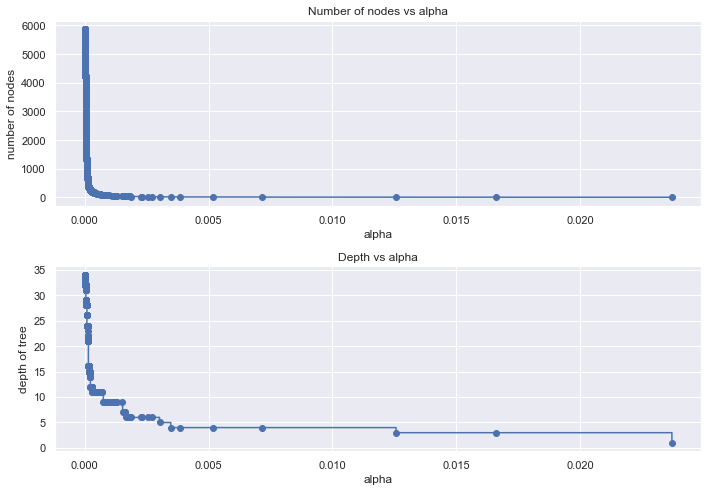

In [167]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

It shows a vertical deep slope, when alpha is slightly smaller the number of nodes and depth of tree are too high.

### Accuracy vs alpha for training and testing sets

In [168]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

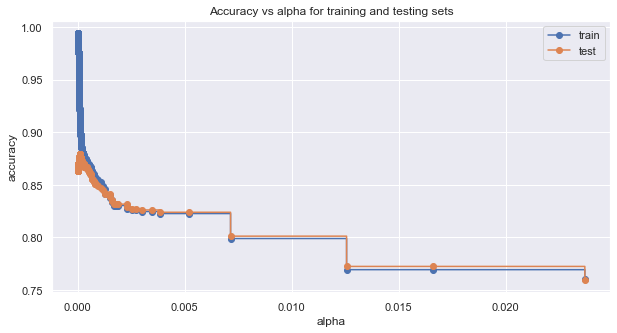

In [169]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [170]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00010830359671671328, random_state=1)
Training accuracy of best model:  0.9110349716446124
Test accuracy of best model:  0.8795368924009924


### Recall vs alpha for training and testing sets

In [218]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [172]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [219]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

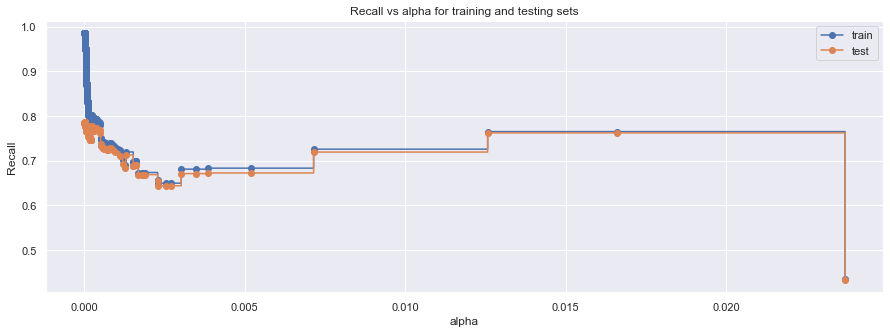

In [173]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Selecting the best model with the highest train and test recall**

In [221]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00010830359671671328, random_state=1)


In [175]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=2.565828416490042e-05, random_state=1)

**Checking performance on train set**

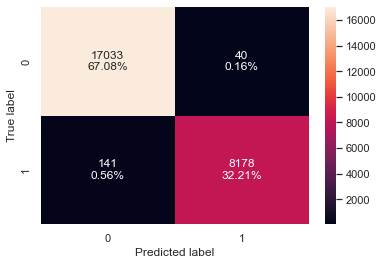

In [176]:
make_confusion_matrix(best_model, X_train, y_train)

**Checking performance on test set**

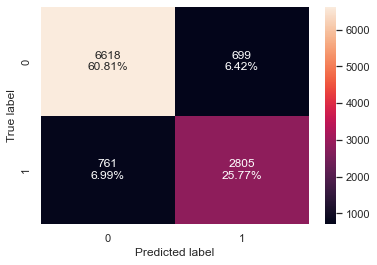

In [177]:
make_confusion_matrix(best_model, X_test, y_test)

In [178]:
get_recall_score(best_model)

Recall on training set :  0.9830508474576272
Recall on test set :  0.7865956253505328


* The next is a tree with alpha = 0.000108

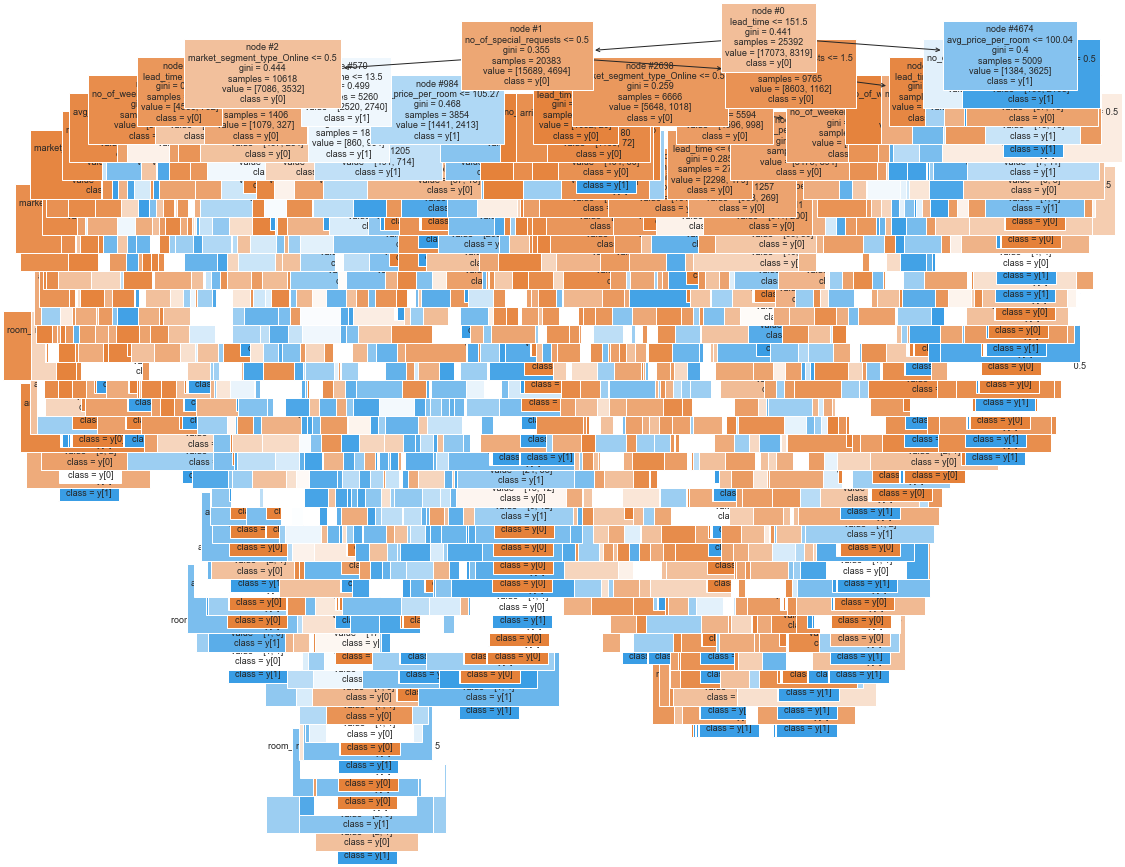

In [132]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Post-pruned Model 

**Now we gonna try another model with alpha = 0.0002, is a little high than 0.0001 but we'll see a more pruned tree model**

In [208]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0002, class_weight={0: 0.67, 1: 0.33}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0002, class_weight={0: 0.67, 1: 0.33},
                       random_state=1)

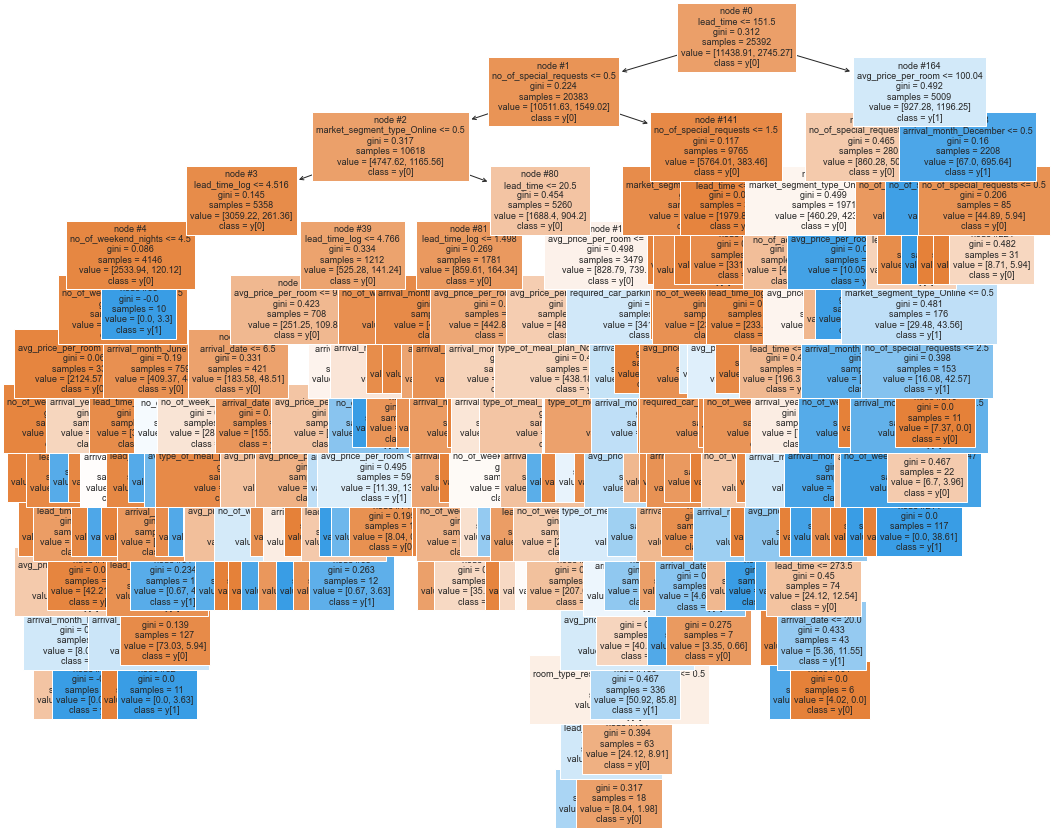

In [209]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

* **Lets see the main features for alpha=0.002**

In [213]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_log <= 4.52
|   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [1586.56, 30.69] class: 0
|   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |   |   |   |--- weights: [466.32, 18.15] class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |   |   |   |--- lead_time_log <= 4.38
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 77.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [14.07, 2.31] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  77.50
|   |   |   |

In [214]:
# importance of features in the tree building
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.344949
avg_price_per_room                    0.190713
market_segment_type_Online            0.142542
no_of_special_requests                0.093669
arrival_month_December                0.044836
lead_time_log                         0.033938
arrival_date                          0.029271
no_of_weekend_nights                  0.025375
no_of_adults                          0.025193
arrival_year_2018                     0.018246
no_of_week_nights                     0.008310
required_car_parking_space_Yes        0.007792
type_of_meal_plan_Meal Plan 2         0.004880
no_of_week_nights_log                 0.004855
type_of_meal_plan_Not Selected        0.004127
arrival_month_June                    0.004049
arrival_month_July                    0.002700
arrival_month_March                   0.002622
arrival_month_September               0.002150
arrival_month_August                  0.002127
arrival_month

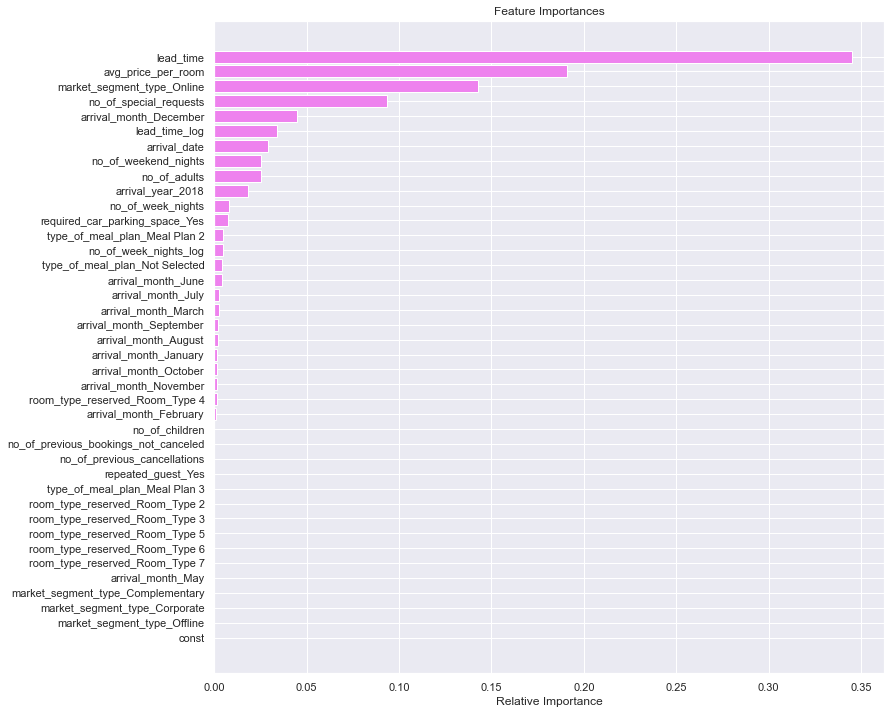

In [215]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Post-pruned model in train set**

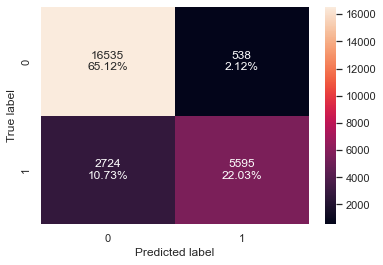

In [210]:
make_confusion_matrix(best_model2, X_train, y_train)

In [228]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)

**Post-pruned model in test set**

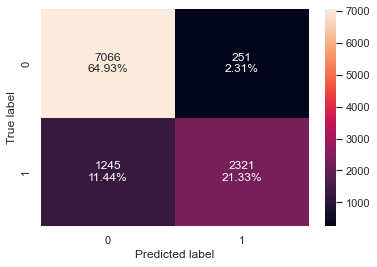

In [211]:
make_confusion_matrix(best_model2, X_test, y_test)

In [232]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)

**Recall in the postpruning and alpha=0.002**

In [212]:
get_recall_score(best_model2)

Recall on training set :  0.6725567976920303
Recall on test set :  0.6508693213684801


With an alpha parameter of 0.003, we obtain a model that performs similarly on the training and test set.

The **Recall** in this case is of 0.67 around

## Model Performance Comparison for Decision Trees

In [230]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,0.982570
1,0.435749
2,0.672557


In [233]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.782670
1,0.432978
2,0.650869


### Conclusions of Decision trees:
**In conclusion we see that in post-pruned model with alpha=0.002 we get a high Recall value and the performance in training set and test set is similar**

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

## Logistic Regression

### Conclusions

* We obtain a good and similar confusion matrixes either with the optimous threshold=0.40, the default threshold=0.5 and the threshold=0.3 obtained by ROC-AUC.
* We have the highest Recall rate of 0.82 with the threshold = 0.3, so we can assure with this matrix that 82 of 100 people tend to cancel the Hotel Booking. 
* The lead_time_log is a positive coefficient that the more number days to increase in lead time, the more probabilities to cancel.
* 'The number of previous bookings not canceled' variable has a negative coefficient, so we conclude when the customer has the lower number of cancellations, that customer tends to not cancell the booking.  
* The worst months to be cancelled are February, March and November. 
* When people select the Room Type 2 and 4 tends to not cancel, because those rooms has negative coefficient in the model.
* The kind of client as Corporate or booking by offline, tends to not cancel, specially when the client goes directly to the hotel (Offline).
* The space in the car parking is important because its negative coefficient helps to reduce the probability to cancel the booking.
* The type of meal Plan 2 has positive coefficient, that kind of food tends to rise the possibilities to cancel the booking.

## Decision Tree

### Conclusions

* With the pre-pruning technique we have a model too small when we take a depth around 5 to 15, but the model is too large when the depth is taked around to 20.
* With the post-pruning technique the tree is too large, but at a alpha level of 0.004 the size is ordinary.
* The best techique to choose in this case is post-pruning, because it has given a graphic to select an alpha level of 0.004 where the tree is not too large, the depth is around of 6, and the Recall in train and test set is 0.65, we can see that in model comparison of decision trees.
* The lead time is the most important variable, so the people that tends to not cancel is when the lead time is less than 151 days, when there is no especial request or is less than 1, when the market segment is type online when the weekend nights is less than 5 days, when avg price is less than 180 euros, they tend to not cancel.

## Recommendations 

* According to the results to the first conclusions, the hotel have cancellations in the majority of their bookings, so the hotel needs to emphasize the qualities of services in many areas. 
* The Hotel can emphasize promotions by special days or even for those customers that frequently travel to the hotel zone.
* The Hotel needs to emphasize a campaign about the turistic places around the hotel for convince to the people to go to the destiny when they book their hotel and do not cancel it. 
* The hotel could invest in renewable energy for the water, the shower, the pool and decrease the bills in electricity and make more possible the offer of cheapest prices and quality services.
* The hotel could consider the invest in more infraestructure or spaces for a good quality of service.
* The hotel should create a document for terms and agreements for do not lost the revenues when someone books at begin and then cancel it.